In [1]:
%matplotlib inline
import sys
sys.path.insert(1,'../Utilities')
# notebook
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import networkx as nx
import json
from math import sin, cos, sqrt, atan2, radians
from utils import *
from data import *
from foodWebGraphing import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [2]:
dta = validatedEiggData()
dta = dta.dropna(subset=['Start date year'])
sorted(filter(lambda x: type(x) == np.float64,list(Counter(dta["Start date year"]).keys())))[-1]

C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: DtypeWarning: Columns (9,22) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2019.0

### Decision 1: Time frame for Eco Net

Let's say we take the last 10 years of available data (start date year) so that we can be reasonably sure those species are still there

### Decision 2: Who's included in Business Net

A lot of people on Eigg are involved in the ecological preservation/ have their livelihood tie to it since thats why tourists come; here we only look at people specifically on commitees (who wield most protection power) and hence have most power to protect the ecology.

### Decision 3: Meta - Net links

This will be anyone who has a direct dependance on the Ecology of Eigg; again this definition needs to be constrained, since technically everyone does, hence we constrain it here to be those who directly take the resource; fishermen, sightseeing organisations

In [4]:
environmentallyDependant = getEnvironmentallyInvolvedPeople()
environmentallyDependant
    # nodes in the examinable period for manual search
    #Will automate later
#       ['aurelia aurita', => Moon jelly
#      'larus argentatus', => Herring gull (seagull)
#      'lanice conchilega', => Sand Worm
#      'luidia ciliaris', => Starfish
#      'turdus merula', => Blackbird
#      'jassa falcata', => Scud
#      'callionymus lyra', => Dragonet fish
#      'rosa spinosissima', => Wild (white) rose
#      'trisopterus minutus', => Cod
#      'spirorbis', => Little sea worm
#      'dictyota dichotoma', => Forkweed (algae) / seaweed
#      'asterias rubens', => Starfish
#      'pecten maximus', => Scallop
#      'nephrops norvegicus', => Lobster
#      'phalacrocorax aristotelis', => Shag
#      'cyanea capillata', => jellyfish
#      'marthasterias glacialis', => starfish
#      'caprella', => Shrimp
#      'porifera', => Sponge
#      'ophiothrix fragilis', => Starfish
#      'calliostoma zizyphinum', => Sea snail
#      'phrynorhombus norvegicus', => Flatfish
#      'larus marinus', => other seagull
#      'echinus esculentus', => Sea urchin
#      'cancer pagurus', => crab
#      'necora puber', => Crab
#      'labrus mixtus', => coloured small fish
#      'electra pilosa', => hairy sea mat
#      'pagurus', => Hermit crab
#      'onchidoris bilamellata', => Sea slug
#      'somateria mollissima'] => Eider (duck)


{'Alex Boden': ['Eigg Shed', 'Sandavore Farm', 'Eigg Huts', 'Hebnet Cic'],
 'Celia Bull': ['Selkie Explorers'],
 'Eddie Scott': ["Sweeney's Bothy",
  "Eddie's Eigg Croft",
  'Eigg Electric',
  'Eigg Shop'],
 'Elizabeth Boden': ['Eigg Huts',
  'Heritage Trust',
  'Eigg Shed',
  'Eigg Primary School',
  'Sandavore Farm',
  'Eigg Trading'],
 'George Carr': ['Laig Farm', 'Eigg Shop'],
 'Laraine Wyn-Jones': ['Eigg Adventures', 'Eigg Camping Pods', 'Eigg Trading'],
 'Lucy Conway': ['Heritage Trust',
  'Lagerona',
  "Sweeney's Bothy",
  "Eddie's Eigg Croft",
  'Eigg Primary School',
  'Eigg Shop'],
 'Neil Robertson': ['Eigg Organics', 'Roadworks'],
 'Owain Wyn-Jones': ['Eigg Adventures', 'Eigg Camping Pods'],
 'Saira Renny': ['Laig Farm', 'Eigg Shop'],
 'Sarah Boden': ['Eigg Huts',
  'Heritage Trust',
  'Eigg Electric',
  'Sandavore Farm',
  'Kildonnan Bay Oysters'],
 'Stuart Millar': ['Fishing Co', 'Galmisdale Cafe', 'Lagerona'],
 'Sue Hollands': ['Eigg Organics', 'Eigg Electric']}

C:\Users\davie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (9,22) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.
C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: DtypeWarning: Columns (9,22) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Counter({'accipiter nisus': 2,
         'aceria thomasi': 5,
         'acrobolbus wilsonii': 1,
         'acrosorium ciliolatum': 1,
         'actitis hypoleucos': 1,
         'adalaria loveni': 1,
         'aglais io': 14,
         'aglais urticae': 4,
         'aglaophenia': 2,
         'ajuga pyramidalis': 1,
         'alauda arvensis': 1,
         'alca torda': 5,
         'alcyonium digitatum': 2,
         'alcyonium glomeratum': 1,
         'allium ursinum': 1,
         'amblyodon dealbatus': 1,
         'amblystegium serpens': 3,
         'amphidium mougeotii': 14,
         'anas platyrhynchos': 2,
         'anastrepta orcadensis': 5,
         'anastrophyllum minutum': 1,
         'andreaea alpina': 1,
         'andreaea rothii': 3,
         'andreaea rupestris': 9,
         'andrena bicolor': 2,
         'anemone nemorosa': 1,
         'aneura pinguis': 16,
         'angelica sylvestris': 1,
         'anoectangium aestivum': 3,
         'anomia': 1,
         'anomobryum julaceu

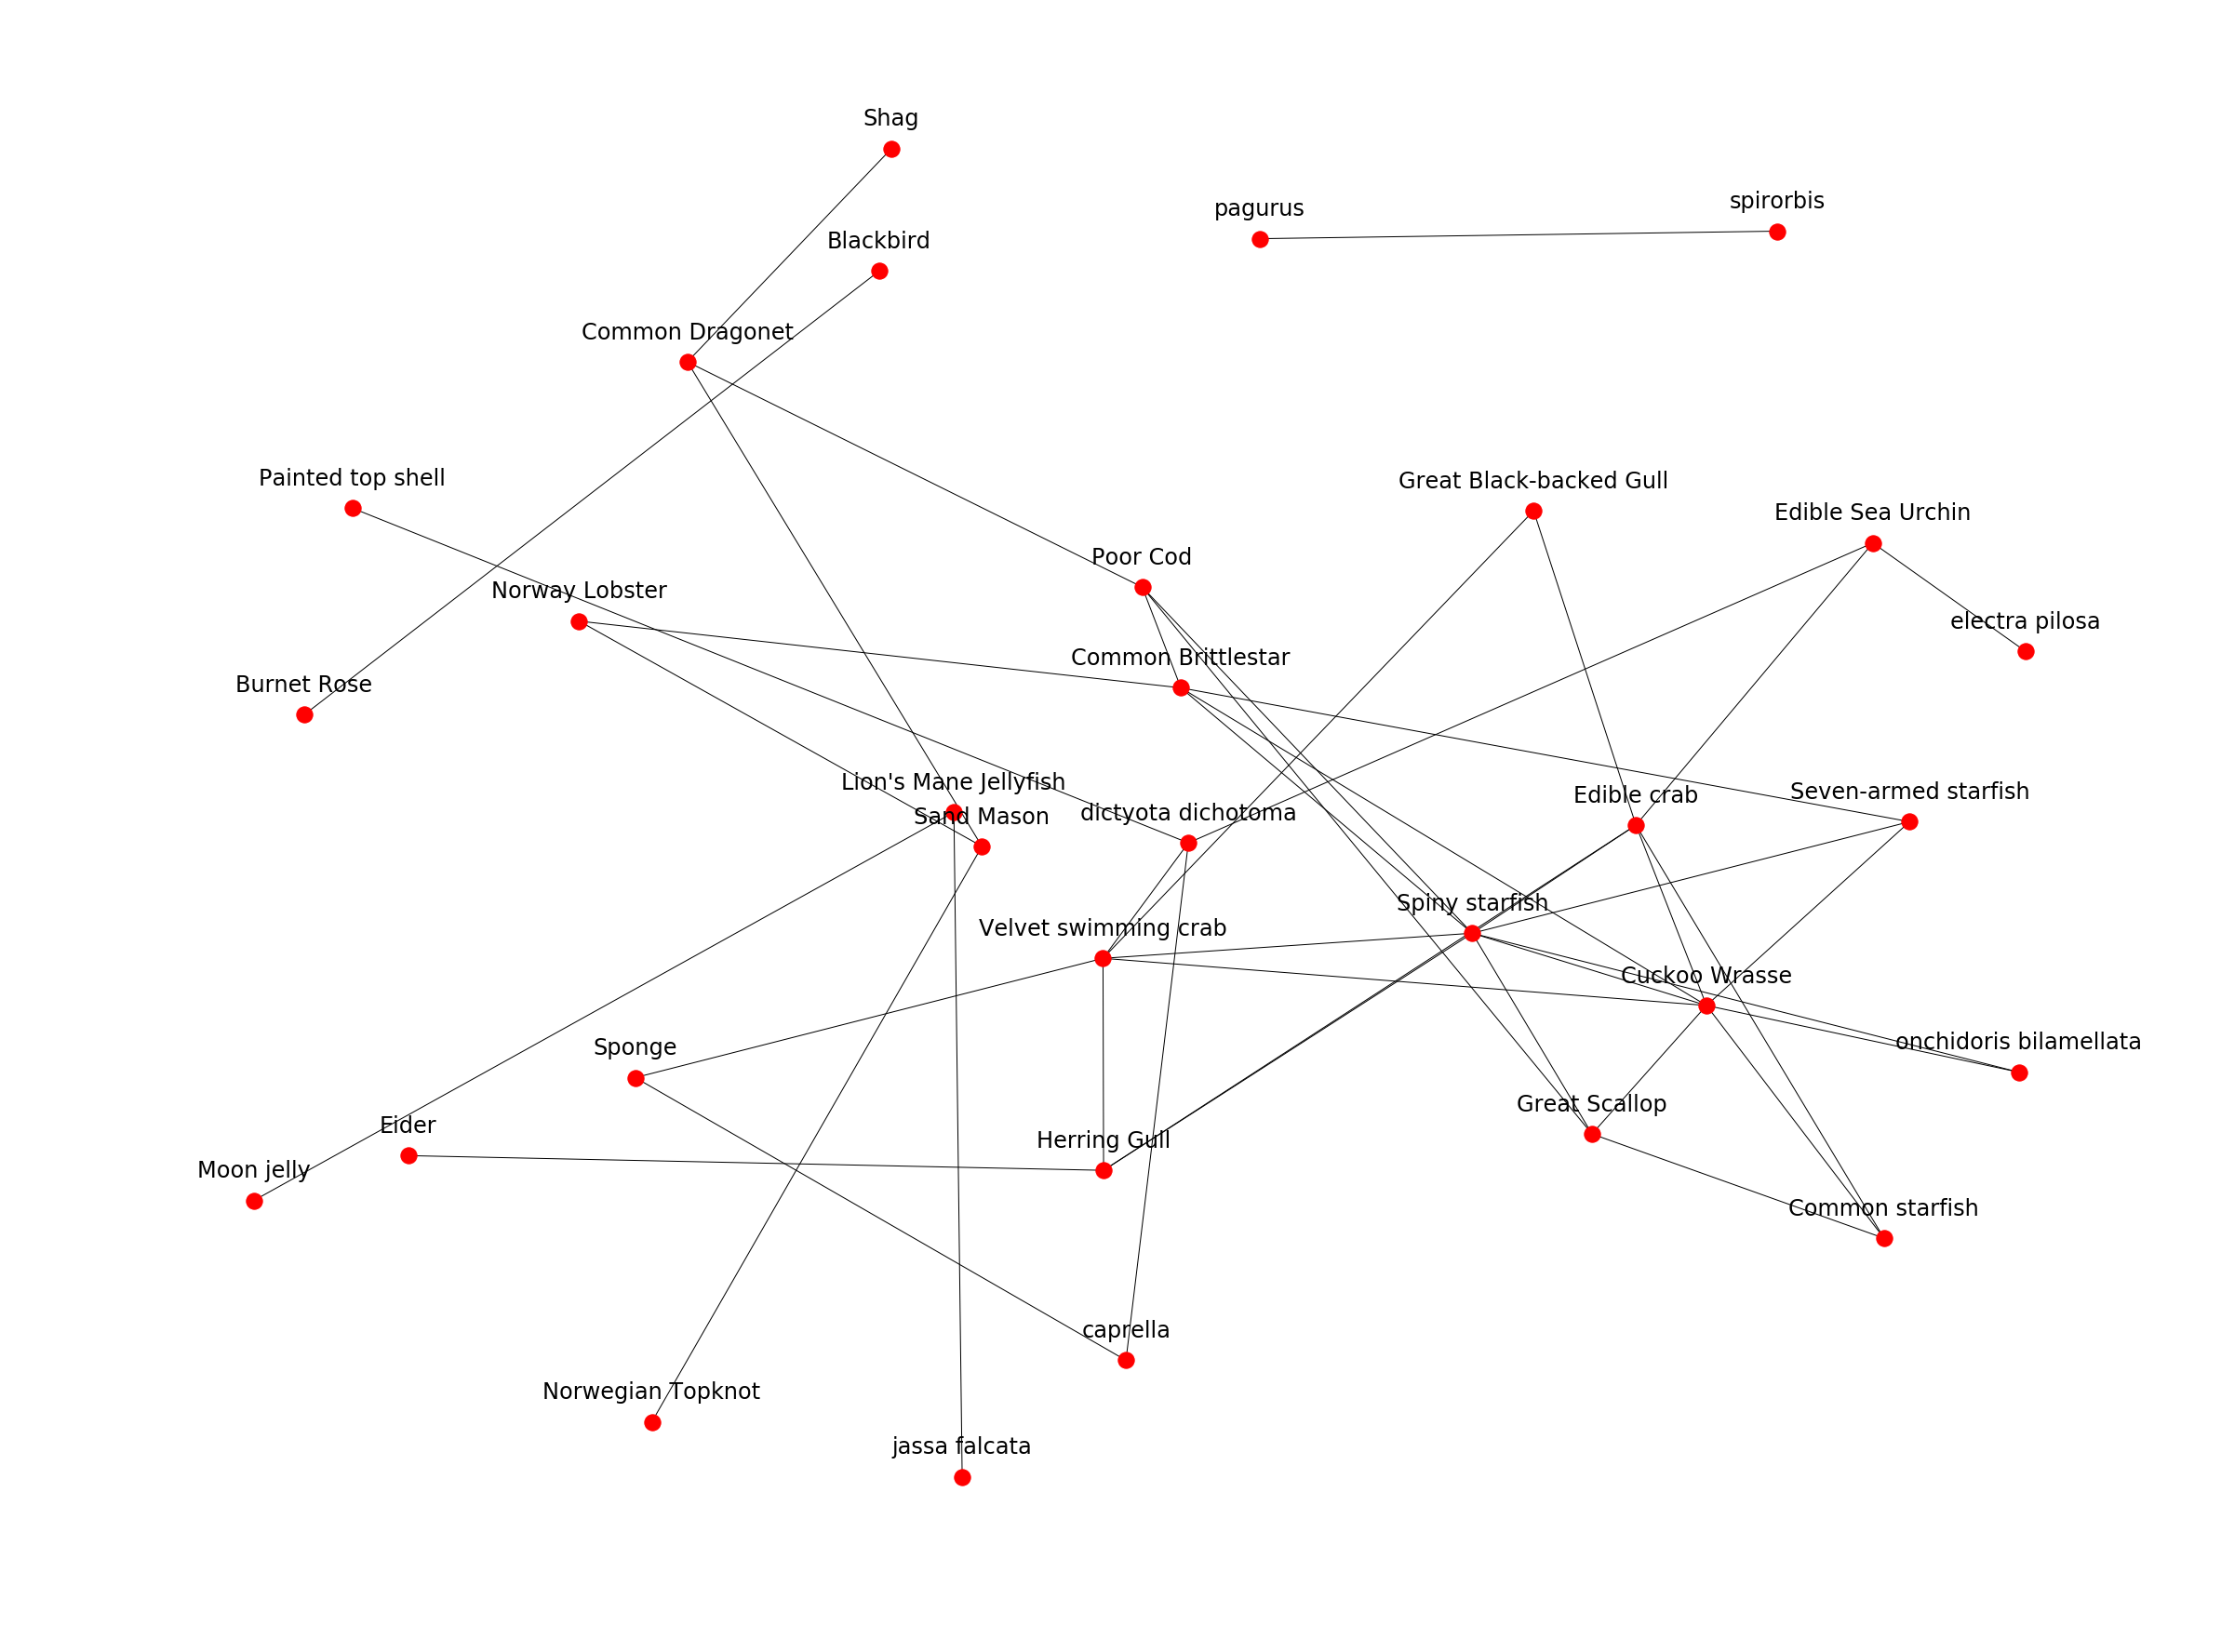

In [12]:
G,mapping = graphFoodWeb(dateRange=(2014,2021))
pos=nx.spring_layout(G,k=1)
nx.draw(G,pos)
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=mapping[label],horizontalalignment='center',fontsize=24)
    
    
dta = validatedEiggData()
dta = dta[dta['Start date year'] >= 2014]
dta = Counter(dta['Scientific name'])
dta

# saveGraphToFile(G,'animals.txt')
# labelsInOrder = list(G.nodes())
# np.savetxt('animalsForFun.txt', labelsInOrder, '%s')

## supplement them here with all of the nodes (involving isolates that arent constructed by routine)